In [1]:
from scipy.stats import binom, bernoulli
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
sns.set_theme()

In [2]:
print(binom.pmf(5,10,0.6)*0.75)
print(binom.pmf(6,10,0.6)+binom.pmf(7,10,0.6)+binom.pmf(8,10,0.6)+binom.pmf(9,10,0.6)+binom.pmf(10,10,0.6))
print(1-binom.cdf(5,10,0.6))

0.15049359360000025
0.6331032576000003
0.6331032576


In [3]:
binom.pmf(5,10,0.6)*binom.pmf(1,1,np.min([1,0.75*1.2]))+(1-binom.cdf(5,10,0.6))

0.8136955699200003

In [4]:
def Q3_classifier_weighting(strong_weight):   
    prob_right = 0
    for i in range(11): # How many weak classifiers are correct
        if i >= (10+strong_weight)/2: #nr needed for majority out of 11 (10 weak 1 strong) is 6 ofc
            prob_right += binom.pmf(i,10,0.6)
        # Assume strong is right
        elif i+strong_weight >= (10+strong_weight)/2: 
            prob_right += 0.75*binom.pmf(i,10,0.6)
    return prob_right

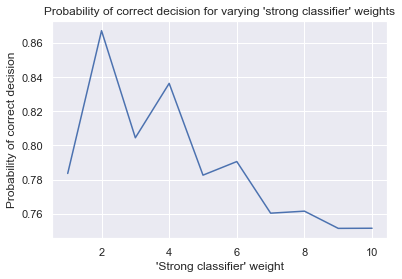

In [5]:
weights = np.arange(1,11)

probabilities = []
for weight in weights:
    prob = Q3_classifier_weighting(weight)
    probabilities.append(prob)

sns.lineplot(x=weights,y=probabilities)
plt.title("Probability of correct decision for varying 'strong classifier' weights")
plt.xlabel("'Strong classifier' weight")
plt.xticks(rotation=0)
plt.ylabel("Probability of correct decision")
plt.show()

### 3.c) AdaBoost.M1 (see lecture slide 40)

In [6]:
#3.c
alpha_m_weak = np.log((1-binom.cdf(5,10,0.6))/binom.cdf(5,10,0.6))
alpha_m_strong = np.log((1-0.25)/0.25)
print("Weak classifiers weight: ", alpha_m_weak)
print("Strong classifier weight: ", alpha_m_strong)

Weak classifiers weight:  0.5455530804032169
Strong classifier weight:  1.0986122886681098


### 3.d

c:\users\tijs\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\tijs\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


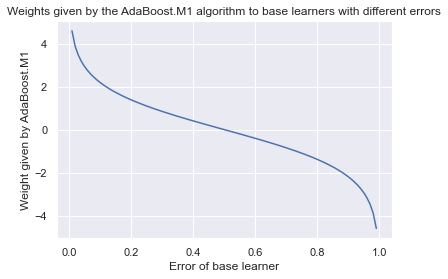

In [7]:
#3.d

errors = np.arange(0,1.01,0.01)
weights = []
for error in errors:
    weight = np.log((1-error)/error)
    weights.append(weight)

sns.lineplot(x=errors,y=weights)
plt.title("Weights given by the AdaBoost.M1 algorithm to base learners with different errors")
plt.xlabel("Error of base learner")
plt.xticks(rotation=0)
plt.ylabel("Weight given by AdaBoost.M1")
plt.show()